# Exploratory Data Analysis

Today, we are going to analytically explore the Charlottesville Crime dataset using Python.


In [47]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# This is a comment! Python won't run any comments, so feel free to write notes here

In [48]:
crime_data = pd.read_csv("Crime_Data.csv")
crime_data.head()

,RecordID,Offense,IncidentID,BlockNumber,StreetName,Agency,DateReported,HourReported
0,3001,FRAUD-FALSE PRETENSES/SWINDLE/CONFIDENCE GAME,201301289,900,PRESTON AVE,CPD,2013-03-04T00:00:00.000Z,2314
1,3002,FRAUD-FALSE PRETENSES/SWINDLE/CONFIDENCE GAME,201301290,900,PRESTON AVE,CPD,2013-03-04T00:00:00.000Z,2359
2,3003,LARCENY-SHOPLIFTING,201301291,1800,HYDRAULIC RD,CPD,2013-03-04T00:00:00.000Z,2238
3,3004,DESCRIBE,201301294,1000,E JEFFERSON ST,CPD,2013-03-05T00:00:00.000Z,1147
4,3005,DISORDERLY CONDUCT,201301295,200,E MARKET ST,CPD,2013-03-05T00:00:00.000Z,1406


## Data Reorganization
Let's remove columns from our database that don't really add any information and clean up some of the formats. Notice how much faster this is than if we were to do this in Excel.

Which column doesn't look particularly helpful? 

It would make sense that the CPD will always address crimes in Cville. Let's take a closer look at the column. 

In [49]:
pd.unique(crime_data.Agency)

array(['CPD '], dtype=object)

It appears that all the values in the agency column are 'CPD.' Let's just get rid of it. 


In [50]:
# Temporarily drop the Agency column (does not actually change crime_data)
crime_data.drop('Agency',1)

,RecordID,Offense,IncidentID,BlockNumber,StreetName,DateReported,HourReported
0,3001,FRAUD-FALSE PRETENSES/SWINDLE/CONFIDENCE GAME,201301289,900,PRESTON AVE,2013-03-04T00:00:00.000Z,2314
1,3002,FRAUD-FALSE PRETENSES/SWINDLE/CONFIDENCE GAME,201301290,900,PRESTON AVE,2013-03-04T00:00:00.000Z,2359
2,3003,LARCENY-SHOPLIFTING,201301291,1800,HYDRAULIC RD,2013-03-04T00:00:00.000Z,2238
3,3004,DESCRIBE,201301294,1000,E JEFFERSON ST,2013-03-05T00:00:00.000Z,1147
4,3005,DISORDERLY CONDUCT,201301295,200,E MARKET ST,2013-03-05T00:00:00.000Z,1406
5,3006,PROPERTY-FOUND/RECOVERED,201301296,2500,WILLARD DR,2013-03-05T00:00:00.000Z,1400
6,3007,LARCENY-ALL OTHER LARCENY,201301297,300,W MAIN ST,2013-03-05T00:00:00.000Z,1420
7,3008,VANDALISM/DAMAGE/DESTRUCTION OF PROPERTY,201301299,1000,ST CHARLES AVE,2013-03-05T00:00:00.000Z,1502
8,3009,DRUG/NARCOTIC VIOLATION,201301300,400,GARRETT ST,2013-03-07T00:00:00.000Z,1717
9,3010,LARCENY-SHOPLIFTING,201301301,1100,5TH ST SW,2013-03-05T00:00:00.000Z,1801


In [51]:
crime_data

,RecordID,Offense,IncidentID,BlockNumber,StreetName,Agency,DateReported,HourReported
0,3001,FRAUD-FALSE PRETENSES/SWINDLE/CONFIDENCE GAME,201301289,900,PRESTON AVE,CPD,2013-03-04T00:00:00.000Z,2314
1,3002,FRAUD-FALSE PRETENSES/SWINDLE/CONFIDENCE GAME,201301290,900,PRESTON AVE,CPD,2013-03-04T00:00:00.000Z,2359
2,3003,LARCENY-SHOPLIFTING,201301291,1800,HYDRAULIC RD,CPD,2013-03-04T00:00:00.000Z,2238
3,3004,DESCRIBE,201301294,1000,E JEFFERSON ST,CPD,2013-03-05T00:00:00.000Z,1147
4,3005,DISORDERLY CONDUCT,201301295,200,E MARKET ST,CPD,2013-03-05T00:00:00.000Z,1406
5,3006,PROPERTY-FOUND/RECOVERED,201301296,2500,WILLARD DR,CPD,2013-03-05T00:00:00.000Z,1400
6,3007,LARCENY-ALL OTHER LARCENY,201301297,300,W MAIN ST,CPD,2013-03-05T00:00:00.000Z,1420
7,3008,VANDALISM/DAMAGE/DESTRUCTION OF PROPERTY,201301299,1000,ST CHARLES AVE,CPD,2013-03-05T00:00:00.000Z,1502
8,3009,DRUG/NARCOTIC VIOLATION,201301300,400,GARRETT ST,CPD,2013-03-07T00:00:00.000Z,1717
9,3010,LARCENY-SHOPLIFTING,201301301,1100,5TH ST SW,CPD,2013-03-05T00:00:00.000Z,1801


In [52]:
# Permanently drop Agency
crime_data.drop('Agency', 1, inplace=True)
crime_data

,RecordID,Offense,IncidentID,BlockNumber,StreetName,DateReported,HourReported
0,3001,FRAUD-FALSE PRETENSES/SWINDLE/CONFIDENCE GAME,201301289,900,PRESTON AVE,2013-03-04T00:00:00.000Z,2314
1,3002,FRAUD-FALSE PRETENSES/SWINDLE/CONFIDENCE GAME,201301290,900,PRESTON AVE,2013-03-04T00:00:00.000Z,2359
2,3003,LARCENY-SHOPLIFTING,201301291,1800,HYDRAULIC RD,2013-03-04T00:00:00.000Z,2238
3,3004,DESCRIBE,201301294,1000,E JEFFERSON ST,2013-03-05T00:00:00.000Z,1147
4,3005,DISORDERLY CONDUCT,201301295,200,E MARKET ST,2013-03-05T00:00:00.000Z,1406
5,3006,PROPERTY-FOUND/RECOVERED,201301296,2500,WILLARD DR,2013-03-05T00:00:00.000Z,1400
6,3007,LARCENY-ALL OTHER LARCENY,201301297,300,W MAIN ST,2013-03-05T00:00:00.000Z,1420
7,3008,VANDALISM/DAMAGE/DESTRUCTION OF PROPERTY,201301299,1000,ST CHARLES AVE,2013-03-05T00:00:00.000Z,1502
8,3009,DRUG/NARCOTIC VIOLATION,201301300,400,GARRETT ST,2013-03-07T00:00:00.000Z,1717
9,3010,LARCENY-SHOPLIFTING,201301301,1100,5TH ST SW,2013-03-05T00:00:00.000Z,1801


Now permanently drop the IncidentID column. We won't be using it either. 

In [53]:
# Write your code below!


Let's try to create a column to get the hour in which a crime was reported. We just want to get the hour, and not the minutes. 

In [54]:
crime_data["Hour"] = crime_data.HourReported.apply(lambda x: x//100)
pd.unique(crime_data.Hour)

array([23, 22, 11, 14, 15, 17, 18, 21,  2, 19,  6, 13,  1,  4,  3,  8, 12,
       16,  0, 10, 20,  7,  9,  5, 24])

Great! Now let's create a simple date format for date reported!

In [55]:
crime_data["Date"] = crime_data.DateReported.apply(lambda x: x[:10])
crime_data.Date = pd.to_datetime(crime_data.Date)
crime_data

,RecordID,Offense,IncidentID,BlockNumber,StreetName,DateReported,HourReported,Hour,Date
0,3001,FRAUD-FALSE PRETENSES/SWINDLE/CONFIDENCE GAME,201301289,900,PRESTON AVE,2013-03-04T00:00:00.000Z,2314,23,2013-03-04
1,3002,FRAUD-FALSE PRETENSES/SWINDLE/CONFIDENCE GAME,201301290,900,PRESTON AVE,2013-03-04T00:00:00.000Z,2359,23,2013-03-04
2,3003,LARCENY-SHOPLIFTING,201301291,1800,HYDRAULIC RD,2013-03-04T00:00:00.000Z,2238,22,2013-03-04
3,3004,DESCRIBE,201301294,1000,E JEFFERSON ST,2013-03-05T00:00:00.000Z,1147,11,2013-03-05
4,3005,DISORDERLY CONDUCT,201301295,200,E MARKET ST,2013-03-05T00:00:00.000Z,1406,14,2013-03-05
5,3006,PROPERTY-FOUND/RECOVERED,201301296,2500,WILLARD DR,2013-03-05T00:00:00.000Z,1400,14,2013-03-05
6,3007,LARCENY-ALL OTHER LARCENY,201301297,300,W MAIN ST,2013-03-05T00:00:00.000Z,1420,14,2013-03-05
7,3008,VANDALISM/DAMAGE/DESTRUCTION OF PROPERTY,201301299,1000,ST CHARLES AVE,2013-03-05T00:00:00.000Z,1502,15,2013-03-05
8,3009,DRUG/NARCOTIC VIOLATION,201301300,400,GARRETT ST,2013-03-07T00:00:00.000Z,1717,17,2013-03-07
9,3010,LARCENY-SHOPLIFTING,201301301,1100,5TH ST SW,2013-03-05T00:00:00.000Z,1801,18,2013-03-05


In [56]:
crime_data.Date.dtype

dtype('<M8[ns]')

In [59]:
crime_data["Month"] = crime_data.Date.dt.month
pd.unique(crime_data.Month)

array([ 3,  7,  9,  4, 11,  5, 12, 10,  1,  2,  6,  8])

## Data visualization!
What can you learn from the plots below? 

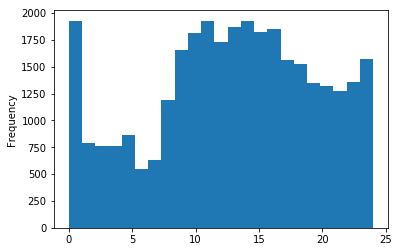

In [65]:
crime_data.Hour.plot.hist(bins=23)

In [71]:
?crime_data.Month.plot.hist(bins=12, rot=0)

# Play with the parameters!
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html#pandas.Series.plot
# Set grid=True



## Text Analytics
Code source: https://stackoverflow.com/questions/40206249/count-of-most-popular-words-in-a-pandas-dataframe

In [90]:
# !pip3 install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/nikhil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nikhil/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [91]:
txt = crime_data.Offense.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')

In [92]:
words = nltk.tokenize.word_tokenize(txt)
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [94]:
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
top_words = pd.DataFrame(words_except_stop_dist.most_common(15),
                    columns=['Word', 'Frequency']).set_index('Word')
top_words

,Frequency
Word,
vehicle,4928
towed,3008
assault-simple,2834
larceny-theft,2388
property,2385
run,2231
traffic-hit,2230
vandalism/damage/destruction,2168
larceny,2077


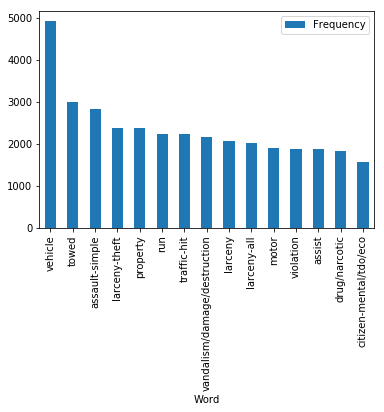

In [95]:
top_words.plot.bar()